In [69]:
import pandas as pd
import numpy as np
from pandas.plotting import autocorrelation_plot
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

In [35]:
fname = 'shampoo.csv'

In [36]:
series = pd.read_csv('shampoo.csv', header=0).squeeze('columns')

In [37]:
series.loc[:,'Month'] = '190' + series['Month']

In [38]:
series.loc[:, 'Month'] = pd.to_datetime(series.loc[:, 'Month'], format='%Y-%m')

In [39]:
series = series.set_index('Month')

<AxesSubplot:xlabel='Month'>

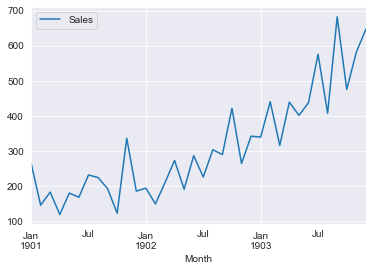

In [41]:
series.plot()

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

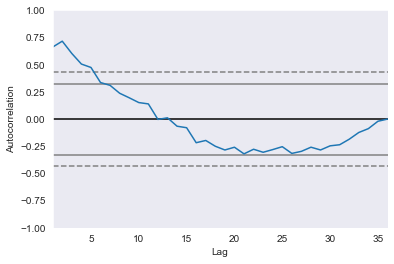

In [43]:
autocorrelation_plot(series)

In [47]:
arima = ARIMA(series, order=(5, 1, 0))

/opt/homebrew/Caskroom/miniforge/base/envs/regular/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [49]:
model_fit = arima.fit()

In [50]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                   36
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -198.485
Date:                Tue, 31 May 2022   AIC                            408.969
Time:                        19:55:41   BIC                            418.301
Sample:                    01-01-1901   HQIC                           412.191
                         - 12-01-1903                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9014      0.247     -3.647      0.000      -1.386      -0.417
ar.L2         -0.2284      0.268     -0.851      0.395      -0.754       0.298
ar.L3          0.0747      0.291      0.256      0.798      -0.497       0.646
ar.L4          0.2519      0.340      0.742      0.458      -0.414       0.918
ar.L5          0.3344      0.210      1.593      0.111      -0.077       0.746
sigma2      4728.9608   1316.021      3.593      0.000    2149.607    7308.314
===================================================================================
Ljung-Box (L1) (Q):                   0.61   Jarque-Bera (JB):                 0.96
Prob(Q):                              0.44   Prob(JB):                         0.62
Heteroskedasticity (H):               1.07   Skew:                             0.28
Prob(H) (two-sided):                  0.90   Kurtosis:                         2.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [51]:
residuals = pd.DataFrame(model_fit.resid)

<AxesSubplot:xlabel='Month'>

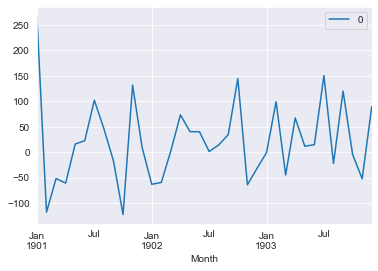

In [52]:
residuals.plot()

<AxesSubplot:ylabel='Density'>

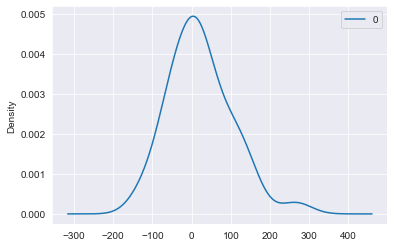

In [53]:
residuals.plot(kind='kde')

In [54]:
residuals.describe()

,0
count,36.000000
mean,21.936144
std,80.774430
min,-122.292030
25%,-35.040859
50%,13.147218
75%,68.848286
max,266.000000


### Forecasting

In [56]:
series.index = series.index.to_period('M')

In [58]:
X = series.values

In [59]:
size = int(len(X) * 0.66)

In [60]:
train, test = X[:size], X[size:]

In [61]:
history = [x for x in train]

In [65]:
predictions = list()
# walk forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5, 1, 0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print(f'Predicted: {yhat}, Expected: {obs}')

Predicted: 368.92634959370133, Expected: [342.3]
Predicted: 327.09538408023474, Expected: [339.7]
Predicted: 324.3197617141249, Expected: [440.4]
Predicted: 356.4541584612052, Expected: [315.9]
Predicted: 378.88296379573495, Expected: [439.3]
Predicted: 350.00208829067003, Expected: [401.3]
Predicted: 417.2596076198795, Expected: [437.4]
Predicted: 384.7527295681848, Expected: [575.5]
Predicted: 451.38118162262776, Expected: [407.6]
Predicted: 511.1218227194882, Expected: [682.]
Predicted: 465.45758746056293, Expected: [475.3]
Predicted: 639.0694691624274, Expected: [581.3]
Predicted: 544.21902336616, Expected: [646.9]


In [67]:
rmse = np.sqrt(mean_squared_error(test, predictions))

In [68]:
rmse

89.50834162476345

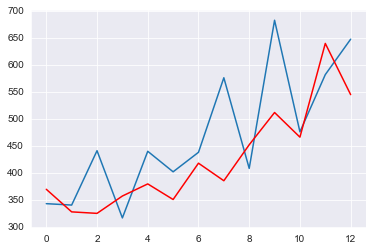

In [71]:
plt.plot(test)
plt.plot(predictions, color='r')